## Import Necessary Libraries

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Read CSV File

In [26]:
dataFile = pd.read_csv('../Dataset/OriginalDataset.csv')
dataFile.shape

(918, 12)

In [27]:
dataFile

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Check Null Values


In [28]:
dataFile.isna().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

* Since there are no null values in the dataset moving on to the next step

## Identify Data Types

In [29]:
qualitative = [] #Categorical
quantitative = [] # Numerical
for feature in dataFile.columns:
    if (type(dataFile[feature][0]) == str):
        qualitative.append(feature)
    else:
        quantitative.append(feature)
    
print(qualitative)
print(quantitative)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [30]:
dataFile.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
Column_Data = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in Column_Data:
    col=("{}\n ".format(dataFile[i].value_counts()))
    print (col)

M    725
F    193
Name: Sex, dtype: int64
 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
 
N    547
Y    371
Name: ExerciseAngina, dtype: int64
 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
 


## Format Categorical Data to Numerical Data

In [32]:
#mapping categorical data to Numerical data

Map_gender = {'M':1,'F':0}
dataFile['Sex'] = dataFile['Sex'].map(Map_gender)

Map_CPType = {'TA':0,'ATA':1, 'NAP': 2, 'ASY': 3}
dataFile['ChestPainType'] = dataFile['ChestPainType'].map(Map_CPType)

Map_ECG = {'Normal':0,'ST':1, 'LVH': 2}
dataFile['RestingECG'] = dataFile['RestingECG'].map(Map_ECG)

Map_Exercise = {'Y':1,'N':0}
dataFile['ExerciseAngina'] = dataFile['ExerciseAngina'].map(Map_Exercise)

Map_Exercise = {'Up':1,'Flat':0, 'Down': 2}
dataFile['ST_Slope'] = dataFile['ST_Slope'].map(Map_Exercise)

In [33]:
Column_Data = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in Column_Data:
    col=("{}\n ".format(dataFile[i].value_counts()))
    print (col)

1    725
0    193
Name: Sex, dtype: int64
 
3    496
2    203
1    173
0     46
Name: ChestPainType, dtype: int64
 
0    552
2    188
1    178
Name: RestingECG, dtype: int64
 
0    547
1    371
Name: ExerciseAngina, dtype: int64
 
0    460
1    395
2     63
Name: ST_Slope, dtype: int64
 


In [34]:
dataFile

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,0,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,0,1
914,68,1,3,144,193,1,0,141,0,3.4,0,1
915,57,1,3,130,131,0,0,115,1,1.2,0,1
916,57,0,1,130,236,0,2,174,0,0.0,0,1


## Remove Outliers

e:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

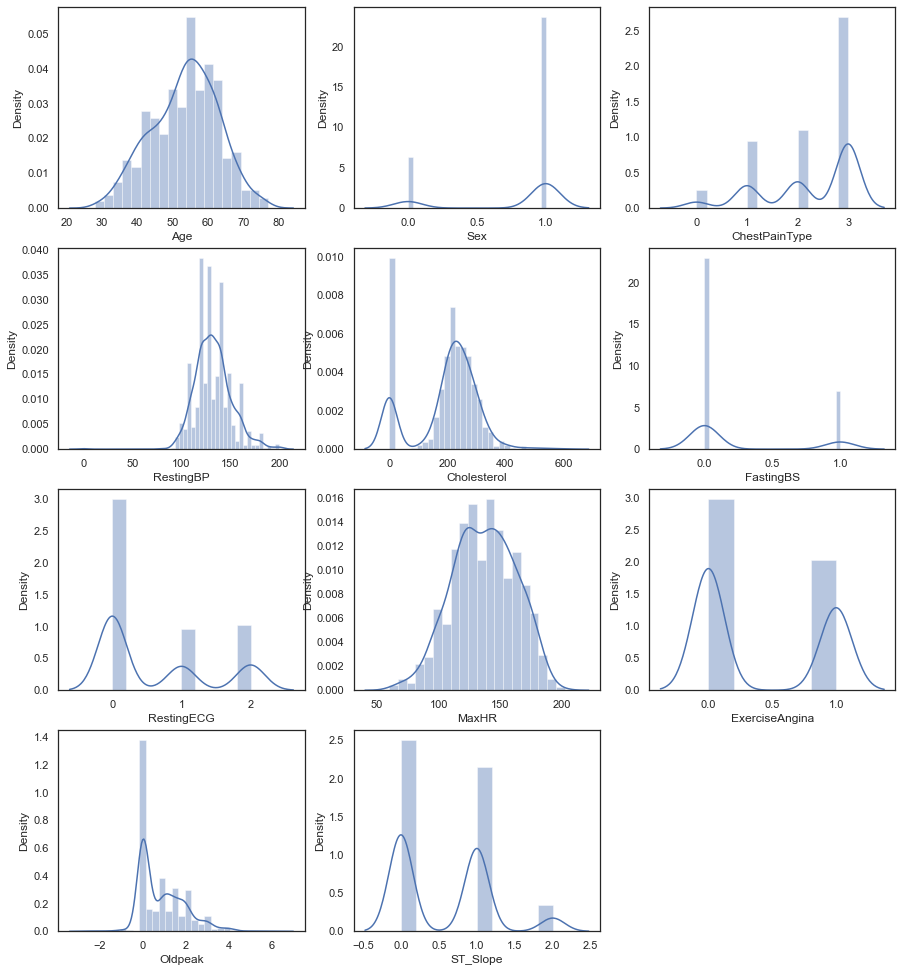

In [35]:
columns = dataFile.columns
columns = list(columns)
columns.pop()

sns.set(rc={'figure.figsize': (15, 17)})
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(4,3,i+1)
    cName = columns[i]
    sns.distplot(dataFile[cName])


In [36]:
dataFile[(np.abs(stats.zscore(dataFile)) < 3).all(axis=1)]

#Replace 0 with null values
cols = ['Cholesterol']
dataFile[cols] = dataFile[cols].replace({0:np.nan})

In [37]:
dataFile.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [38]:
dataFile.dropna(inplace=True)

#Replace null values with 0
def replace_zeros_w_random_normal(DF,label, mu, sigma):
    truth_1 = DF[label] == 0
    random = np.random.normal(mu, sigma, DF.shape[0])
    filt = DF[DF[label] > 0]
    vector_1 = truth_1 * random
    truth_2 = vector_1 == 0
    vector_2 = truth_2 * DF[label]
    DF[label] = np.maximum(vector_1,vector_2)
    return DF

In [39]:
dataFile.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
dataFile

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,1,0
1,49,0,2,160,180.0,0,0,156,0,1.0,0,1
2,37,1,1,130,283.0,0,1,98,0,0.0,1,0
3,48,0,3,138,214.0,0,0,108,1,1.5,0,1
4,54,1,2,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264.0,0,0,132,0,1.2,0,1
914,68,1,3,144,193.0,1,0,141,0,3.4,0,1
915,57,1,3,130,131.0,0,0,115,1,1.2,0,1
916,57,0,1,130,236.0,0,2,174,0,0.0,0,1


In [41]:
dataFile.to_csv('../PreprocessedDataset/heart.csv', index = False)